In [1]:
#imports
import pandas as pd
import numpy as np

In [2]:
#csv -> dataframe
species_df = pd.read_csv('species.csv', dtype = str)
parks_df = pd.read_csv('parks.csv')

In [3]:
species_df.head()
#Note: not sure why there is a 14th data column showing-there are only 13 columns of data-this is confirmed
#in the documentation for the dataset. Will come back and drop that.

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [4]:
parks_df.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [5]:
#drop that extra column in species_df
species_df = species_df.iloc[: , :-1]
species_df

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,NaN,NaN
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,NaN,NaN
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,NaN,NaN
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,NaN,NaN


In [6]:
#how many labels are in the Nativeness column + what are they?
species_df["Nativeness"].value_counts()

Native           75950
Not Native       11095
Unknown           7101
Present             53
Not Confirmed        4
Name: Nativeness, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()
species_df['Nativeness']=class_labels.fit_transform(species_df['Nativeness'].values)
species_df

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,0,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,0,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,2,Common,NaN,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,0,NaN,NaN,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,4,Common,Breeder,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,0,Uncommon,NaN,NaN
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,0,Uncommon,NaN,NaN
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,2,Uncommon,NaN,NaN
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,0,Rare,NaN,NaN


In [10]:
#what are the possible labels for the "Record Status" column?
species_df["Record Status"].value_counts()

Approved                86254
In Review               32937
None                        6
 Northern Pintail           1
 Downy Chess                1
 Wiregrass                  1
 Manati                     1
 Bushtit                    1
 Speckled Trout             1
P.Nut Sedge                 1
 Wild Rose                  1
 Cranesbill                 1
 Skunkbush                  1
 Common Poorwill            1
 American Crow              1
 Bluebell                   1
 Goosefoot                  1
 Skyrocket Gilia            1
 Osha                       1
 Liver Leaf*                1
 Golden Pea                 1
 Whortleberry               1
 Purple Cockle              1
 Cenizo                     1
 Dames Rocket               1
 Shadbush                   1
 Speedwell                  1
 Fringed Sage               1
 White-Footed Mouse         1
 Devil's Shoelaces          1
 Kinnikinnick               1
 *                          1
 Wapiti                     1
 Verdolaga

In [11]:
#entries where "Record Status" is a Common Name clearly have errors
#entries with "In Review" record status are missing data in some fields,
#may not be as reliable as "Approved" entries
#BUT they make up a substantial portion of the dataset - let's try keeping them in

species_df = species_df[species_df['Record Status'].isin(["Approved", "In Review"])]
species_df

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,0,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,0,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,2,Common,NaN,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,0,NaN,NaN,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,4,Common,Breeder,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,0,Uncommon,NaN,NaN
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,0,Uncommon,NaN,NaN
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,2,Uncommon,NaN,NaN
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,0,Rare,NaN,NaN


In [12]:
#this data is primarily text
#so we will need to do some label encoding before we can create and train data models

#label encode Park Name
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()

def LabelEncode (df):
    for col in df:
        df[col] = class_labels.fit_transform(df[col].values)

In [13]:
#label encode species dataframe
LabelEncode(species_df)
species_df

<ipython-input-12-80ab2d7ab1d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = class_labels.fit_transform(df[col].values)


,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,0,0,8,41,417,1130,20527,0,4,0,3,12,8
1,1,0,8,41,417,29730,22166,0,4,0,0,20,8
2,2,0,8,87,352,7202,8773,0,4,1,1,20,5
3,3,0,8,87,352,7204,11183,0,0,0,6,20,0
4,4,0,8,87,352,45436,3332,0,4,2,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,119186,55,13,474,2012,40595,9304,0,4,0,4,20,8
119244,119187,55,13,546,2301,45396,6190,0,4,0,4,20,8
119245,119188,55,13,546,2301,45411,34671,0,4,1,4,20,8
119246,119189,55,13,553,2331,23324,8952,0,4,0,3,20,8


In [14]:
#scientific names should be unique - each entry already has unique identifier in "Species ID"
#common names are useful for humans but may just muddy the waters for machine learning/modeling

species_df_filtered = species_df.drop(labels = ["Scientific Name", "Common Names"], axis = 1)

In [15]:
species_df_filtered

,Species ID,Park Name,Category,Order,Family,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,0,0,8,41,417,0,4,0,3,12,8
1,1,0,8,41,417,0,4,0,0,20,8
2,2,0,8,87,352,0,4,1,1,20,5
3,3,0,8,87,352,0,0,0,6,20,0
4,4,0,8,87,352,0,4,2,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...
119243,119186,55,13,474,2012,0,4,0,4,20,8
119244,119187,55,13,546,2301,0,4,0,4,20,8
119245,119188,55,13,546,2301,0,4,1,4,20,8
119246,119189,55,13,553,2331,0,4,0,3,20,8


In [16]:
#how many labels are in the Nativeness column?
species_df_filtered["Nativeness"].value_counts()

0    75950
3    25045
1    11095
2     7101
Name: Nativeness, dtype: int64

In [17]:
#check data types - see if our label encoding behaved
species_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119191 entries, 0 to 119247
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Species ID           119191 non-null  int64
 1   Park Name            119191 non-null  int64
 2   Category             119191 non-null  int64
 3   Order                119191 non-null  int64
 4   Family               119191 non-null  int64
 5   Record Status        119191 non-null  int64
 6   Occurrence           119191 non-null  int64
 7   Nativeness           119191 non-null  int64
 8   Abundance            119191 non-null  int64
 9   Seasonality          119191 non-null  int64
 10  Conservation Status  119191 non-null  int64
dtypes: int64(11)
memory usage: 10.9 MB


In [18]:
#import train_test_split
from sklearn.model_selection import train_test_split

X = species_df_filtered.drop('Nativeness', axis=1)
y = species_df_filtered['Nativeness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
#set up Logistic Regression model
from sklearn.linear_model import LogisticRegression

regression_rev = LogisticRegression()
regression_rev.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
#check performance of regression model
regression_rev.fit(X_train, y_train)
y_pred = regression_rev.predict(X_test)
regression_rev.score(X_test, y_test)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8554889047359369

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cm

array([[14840,     0,   239,   112],
       [ 2194,     0,    13,    12],
       [  761,     0,   645,    14],
       [   84,     0,    16,  4909]])

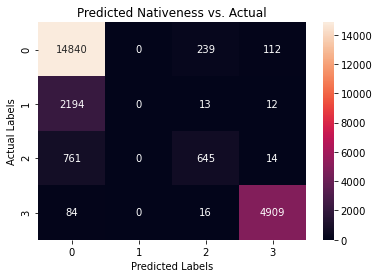

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_title('Predicted Nativeness vs. Actual')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')

plt.show()

In [24]:
#import MSE - check RMSE
from sklearn.metrics import mean_squared_error as MSE

rmse_log_rev = MSE(y_test, y_pred) ** (1/2)
print(rmse_log_rev)

0.5810679836971941


In [25]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [26]:
X = species_df_filtered.drop('Nativeness', axis=1)
y = species_df_filtered['Nativeness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [27]:
dt_rev = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_rev.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [28]:
y_pred = dt_rev.predict(X_test)

In [29]:
dt_rev_score = accuracy_score(y_test, y_pred)
print(dt_rev_score)

0.8706321573891522


In [30]:
cm_dt = confusion_matrix(y_test, y_pred)
cm_dt

array([[14867,     0,   265,    59],
       [ 2177,     0,    36,     6],
       [  424,     0,   980,    16],
       [   85,     0,    16,  4908]])

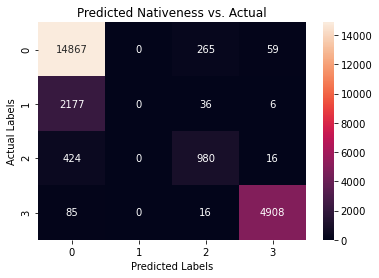

In [31]:
ax = sns.heatmap(cm_dt, annot=True, fmt='g')
ax.set_title('Predicted Nativeness vs. Actual')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')

plt.show()

In [32]:
#check rmse
rmse_dt_rev = MSE(y_test, y_pred) ** (1/2)
print(rmse_dt_rev)

0.5149308105661266


In [33]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

#set seed
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = SEED)

#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [34]:
rf_rev = RandomForestRegressor(n_estimators = 400, min_samples_leaf = 0.1, random_state = SEED)
rf_rev.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=0.1, n_estimators=400, random_state=42)

In [36]:
y_pred = rf_rev.predict(X_test)

rmse_rf_rev = MSE(y_test, y_pred) ** (1/2)
print(rmse_rf_rev)

0.7122155044144471


In [37]:
#neural network imports
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [38]:
X = species_df_filtered.drop('Nativeness', axis=1)
y = species_df_filtered['Nativeness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

number_features = X_train.shape[1]

In [40]:
#defining the model
model_rev = Sequential()
model_rev.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(number_features,)))
model_rev.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model_rev.add(Dense(4, activation='softmax'))

In [41]:
model_rev.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
model_rev.fit(X_train, y_train, epochs=100, batch_size=100, verbose=2)

Epoch 1/100
954/954 - 2s - loss: 0.4229 - accuracy: 0.8540
Epoch 2/100
954/954 - 1s - loss: 0.3652 - accuracy: 0.8710
Epoch 3/100
954/954 - 1s - loss: 0.3544 - accuracy: 0.8748
Epoch 4/100
954/954 - 1s - loss: 0.3462 - accuracy: 0.8766
Epoch 5/100
954/954 - 1s - loss: 0.3391 - accuracy: 0.8788
Epoch 6/100
954/954 - 1s - loss: 0.3346 - accuracy: 0.8798
Epoch 7/100
954/954 - 1s - loss: 0.3296 - accuracy: 0.8810
Epoch 8/100
954/954 - 1s - loss: 0.3259 - accuracy: 0.8826
Epoch 9/100
954/954 - 1s - loss: 0.3220 - accuracy: 0.8840
Epoch 10/100
954/954 - 1s - loss: 0.3189 - accuracy: 0.8845
Epoch 11/100
954/954 - 1s - loss: 0.3154 - accuracy: 0.8858
Epoch 12/100
954/954 - 1s - loss: 0.3132 - accuracy: 0.8868
Epoch 13/100
954/954 - 1s - loss: 0.3108 - accuracy: 0.8869
Epoch 14/100
954/954 - 1s - loss: 0.3084 - accuracy: 0.8876
Epoch 15/100
954/954 - 1s - loss: 0.3070 - accuracy: 0.8883
Epoch 16/100
954/954 - 1s - loss: 0.3050 - accuracy: 0.8889
Epoch 17/100
954/954 - 2s - loss: 0.3029 - accura